In [2]:
import numpy as np
import matplotlib.pyplot as plt
# For Sample Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN



## K-Means, Silhouette Score, & PCA

Silhouette Score: 0.3951588575541123
Best number of clusters: 3
Best silhouette score: 0.40976103965261357


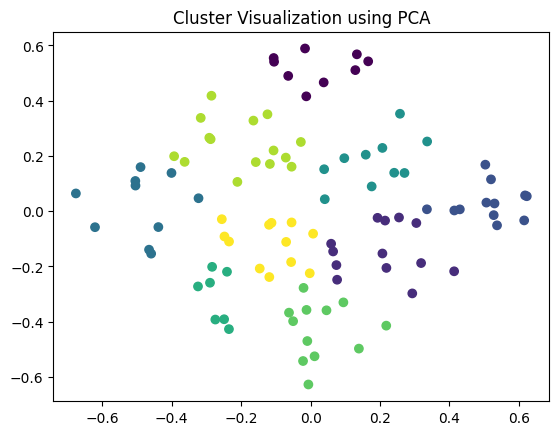

In [3]:
# Sample data
X = np.random.rand(100, 2)

# Fit K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Calculate silhouette score
score = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", score)

# Sample data
X = np.random.rand(100, 2)

best_k = 0
best_score = -1

# Try different numbers of clusters
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    if score > best_score:
        best_score = score
        best_k = k

print("Best number of clusters:", best_k)
print("Best silhouette score:", best_score)
labels = kmeans.labels_


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('Cluster Visualization using PCA')

plt.show()


## kNN & DBSCAN 

In [9]:
X.shape

(100, 2)

In [8]:
distances

array([0.11855505, 0.12554456, 0.12654394, 0.12975652, 0.13203356,
       0.13291575, 0.13300103, 0.13615311, 0.13901284, 0.14281098,
       0.14708462, 0.15193292, 0.15193292, 0.15221408, 0.15697097,
       0.15707285, 0.16007988, 0.16028683, 0.16047891, 0.16081165,
       0.16081165, 0.16098763, 0.16131705, 0.16253532, 0.16327897,
       0.16449206, 0.16544566, 0.16559685, 0.16579953, 0.16616587,
       0.16738583, 0.16738583, 0.16750301, 0.16850637, 0.16882131,
       0.1688987 , 0.17002808, 0.17002808, 0.17254369, 0.17254369,
       0.17272868, 0.17272868, 0.17292557, 0.17383889, 0.17427193,
       0.17429948, 0.17563562, 0.17576249, 0.17625834, 0.17657874,
       0.17765286, 0.1790651 , 0.17987057, 0.17987057, 0.18117352,
       0.18170485, 0.181965  , 0.18398639, 0.18724371, 0.18837832,
       0.18929474, 0.19043292, 0.19050223, 0.19082412, 0.19252192,
       0.19252564, 0.19452941, 0.19862498, 0.19892851, 0.19945791,
       0.20065883, 0.20370447, 0.20446503, 0.20624955, 0.21211

In [10]:
distances.shape

(100,)

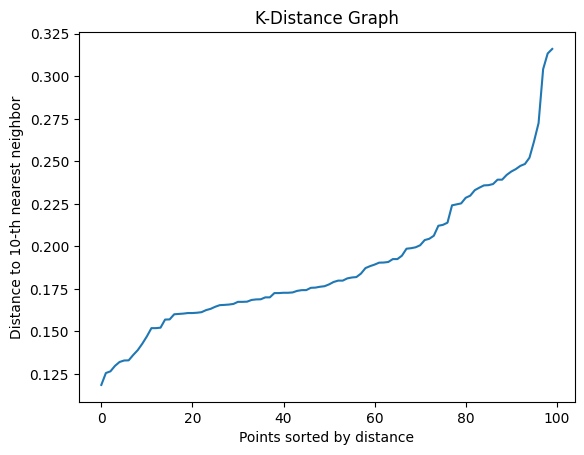

In [6]:
# Find distances to the k-th nearest neighbor (here k = min_samples)
min_samples = 10  # minimum number of points required to form a cluster
k = min_samples
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort the distances for plotting
distances = np.sort(distances[:, k-1], axis=0)

# Plot the k-distance graph
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {k}-th nearest neighbor')
plt.show()
# The elbow is a good point for setting eps

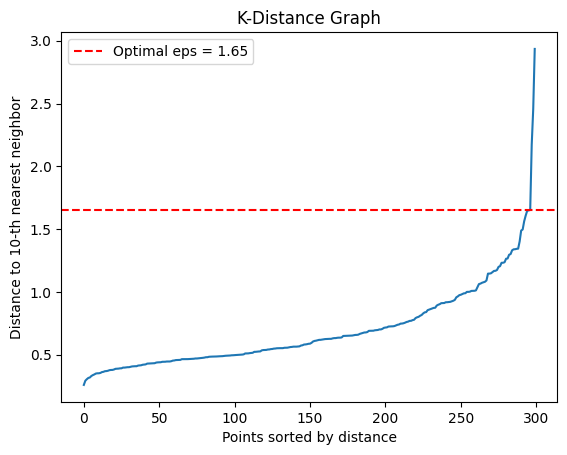

Optimal eps (elbow point): 1.65


In [7]:
# Create sample data with 3 clusters
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Parameters for DBSCAN (min_samples used for k-nearest neighbors)
min_samples = 10
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort the distances for plotting (distance to the k-th nearest neighbor)
distances = np.sort(distances[:, min_samples-1], axis=0)

# Plot the k-distance graph
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {min_samples}-th nearest neighbor')

# Find the optimal eps by identifying the elbow point
# The elbow can be detected by finding the point where the distance starts to increase rapidly
# We'll find the "elbow" by looking for the maximum change in slope
gradient = np.diff(distances)  # Calculate the differences between consecutive distances
second_derivative = np.diff(gradient)  # Second derivative approximates the curvature
optimal_eps_index = np.argmax(second_derivative) + 1  # Find the index where second derivative is maximal

# Optimal eps is the distance at this index
optimal_eps = distances[optimal_eps_index]

# Plot horizontal line at the optimal eps value
plt.axhline(y=optimal_eps, color='r', linestyle='--', label=f'Optimal eps = {optimal_eps:.2f}')

plt.legend()
plt.show()

# Output the optimal eps value
print(f'Optimal eps (elbow point): {optimal_eps:.2f}')


Silhouette Score: 0.8498708652925125
Number of clusters found (excluding noise): 3


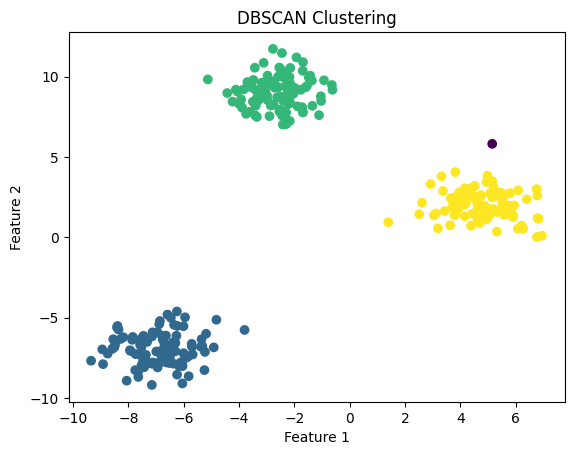

In [8]:
# Create sample data with 3 clusters
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply DBSCAN
eps = 1.65  # maximum distance between points to be considered neighbors
# min_samples = 10  # minimum number of points required to form a cluster
db = DBSCAN(eps=eps, min_samples=min_samples)
labels = db.fit_predict(X)

# Calculate the silhouette score
# Exclude noise points (labeled as -1)
if len(set(labels)) > 1:  # Ensure that there is at least one cluster (excluding noise)
    mask = labels != -1
    score = silhouette_score(X[mask], labels[mask])  # Only use points that are not noise
    print(f'Silhouette Score: {score}')
else:
    print('Silhouette Score cannot be computed because all points are noise.')

# Count the number of clusters (excluding noise points labeled as -1)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters found (excluding noise): {num_clusters}')

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
